**Université AMADOU MAHTAR MBOW**

**MISID**

**TP ACP**

*albertdiompy@yahoo.fr*


Le tableau des données, ci-dessous, indique les dépenses annuelles moyennes de consommation de douze catégories socio-professionnelles.

Les douze individus du tableau, qui sont ici présentés en ligne, désignent des catégories socio-professionnelles caractérisées par la CSP variable qualitative à trois modalités (1 = manœuvre, 2 = employé et 3 = cadre) et le nombre d’enfants (2, 3, 4 ou 5).

Par exemple, l’individu MA2 désigne la catégorie "manœuvre avec deux enfants", EM2 la catégorie "employé avec deux enfants", CA2 la catégorie "cadre avec deux enfants", etc.

Les sept premières variables, qui sont présentées ici en colonne, sont les variables actives. Ces variables désignent respectivement les dépenses annuelles moyennes de consommation en pain, légumes, fruits, viande, volaille, lait et vin.

On effectue l’ACP normée (ACPN) de ce tableau.

In [1]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_excel("depenses_annuelle.xlsx", index_col=0)
df.head()

,pain,légumes,fruits,viande,volaille,lait,vin
IDEN,,,,,,,
MA2,332,428,354,1437,526,247,427
EM2,293,559,388,1527,567,239,258
CA2,372,767,562,1948,927,235,433
MA3,406,563,341,1507,544,324,407
EM3,386,608,396,1501,568,319,363


In [44]:
df.describe()

,pain,légumes,fruits,viande,volaille,lait,vin
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,446.666667,732.000000,505.000000,1886.750000,804.000000,358.250000,368.583333
std,107.147590,189.180049,165.092261,395.750409,248.682711,117.127068,71.781814
min,293.000000,428.000000,341.000000,1437.000000,526.000000,235.000000,258.000000
25%,381.750000,596.750000,382.750000,1522.000000,567.750000,246.000000,310.250000
50%,422.000000,733.000000,453.500000,1852.000000,760.500000,321.500000,385.000000
75%,519.750000,802.500000,576.750000,2128.250000,982.250000,434.250000,418.750000
max,655.000000,1097.000000,887.000000,2630.000000,1167.000000,561.000000,486.000000


## Calcul de la matrice de covariance :
Une fois les données normalisées, nous avons calculé la matrice de covariance cov_matrix des données transposées (chaque colonne représentant une variable). La matrice de covariance capture la relation entre les différentes variables (Poids et Taille).

In [46]:
data = df.corr()
data

,pain,légumes,fruits,viande,volaille,lait,vin
pain,1.000000,0.593110,0.196139,0.321269,0.246814,0.855575,0.303761
légumes,0.593110,1.000000,0.856250,0.881081,0.827300,0.662799,-0.356468
fruits,0.196139,0.856250,1.000000,0.959477,0.926396,0.332189,-0.486281
viande,0.321269,0.881081,0.959477,1.000000,0.981688,0.374591,-0.437235
volaille,0.246814,0.827300,0.926396,0.981688,1.000000,0.232489,-0.401854
lait,0.855575,0.662799,0.332189,0.374591,0.232489,1.000000,0.006880
vin,0.303761,-0.356468,-0.486281,-0.437235,-0.401854,0.006880,1.000000


In [47]:
data.describe()

,pain,légumes,fruits,viande,volaille,lait,vin
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.502381,0.637725,0.540596,0.582981,0.544690,0.494932,-0.053028
std,0.319362,0.459202,0.555511,0.534828,0.533227,0.356224,0.546021
min,0.196139,-0.356468,-0.486281,-0.437235,-0.401854,0.006880,-0.486281
25%,0.275288,0.627954,0.264164,0.347930,0.239652,0.282339,-0.419545
50%,0.321269,0.827300,0.856250,0.881081,0.827300,0.374591,-0.356468
75%,0.724343,0.868665,0.942936,0.970582,0.954042,0.759187,0.155320
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy.stats import pearsonr

# Exemple de DataFrame
# Remplacez ceci par vos propres données
df = pd.DataFrame(data)

# Calcul de la matrice des p-values
p_values = pd.DataFrame(np.zeros((.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            p_values.loc[col1, col2] = np.nan  # Diagonale vide ou NaN
        else:
            _, p_val = pearsonr(df[col1], df[col2])
            p_values.loc[col1, col2] = p_val

print("Matrice des p-values :")
p_values

Matrice des p-values :


,pain,légumes,fruits,viande,volaille,lait,vin
pain,NaN,0.889213,0.501953,0.572747,0.442027,0.006974,0.600741
légumes,0.889213,NaN,0.002539,0.001509,0.005494,0.328018,0.001174
fruits,0.501953,0.002539,NaN,0.000001,0.000011,0.860004,0.000008
viande,0.572747,0.001509,0.000001,NaN,0.000006,0.804935,0.000024
volaille,0.442027,0.005494,0.000011,0.000006,NaN,0.984967,0.000229
lait,0.006974,0.328018,0.860004,0.804935,0.984967,NaN,0.716594
vin,0.600741,0.001174,0.000008,0.000024,0.000229,0.716594,NaN


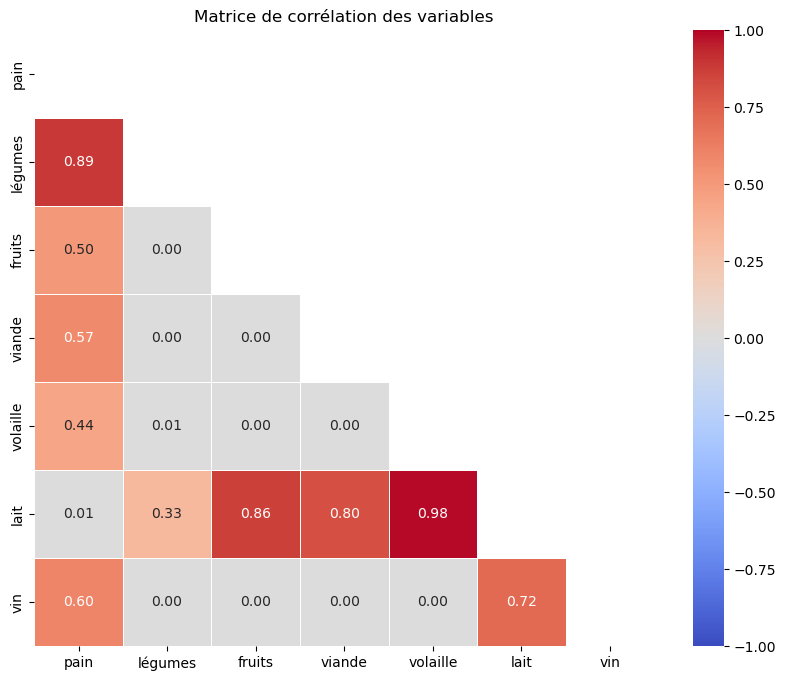

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, linewidths=0.5, mask=mask,cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables")
plt.show()


In [ ]:
import scipy.stats as stats
df1 = df
# Calculer la matrice des p-values
p_values = pd.DataFrame(index=df1.columns, columns=df1.columns)

for col1 in df1.columns:
    for col2 in df1.columns:
        if col1 == col2:
            p_values.loc[col1, col2] = 0
        else:
            corr_test = stats.pearsonr(df1[col1], df1[col2])
            p_values.loc[col1, col2] = corr_test[1]  # On prend la p-value du test de Pearson

# Convertir en numérique
p_values = p_values.astype(float)

print("Matrice des p-values :")
print(p_values)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

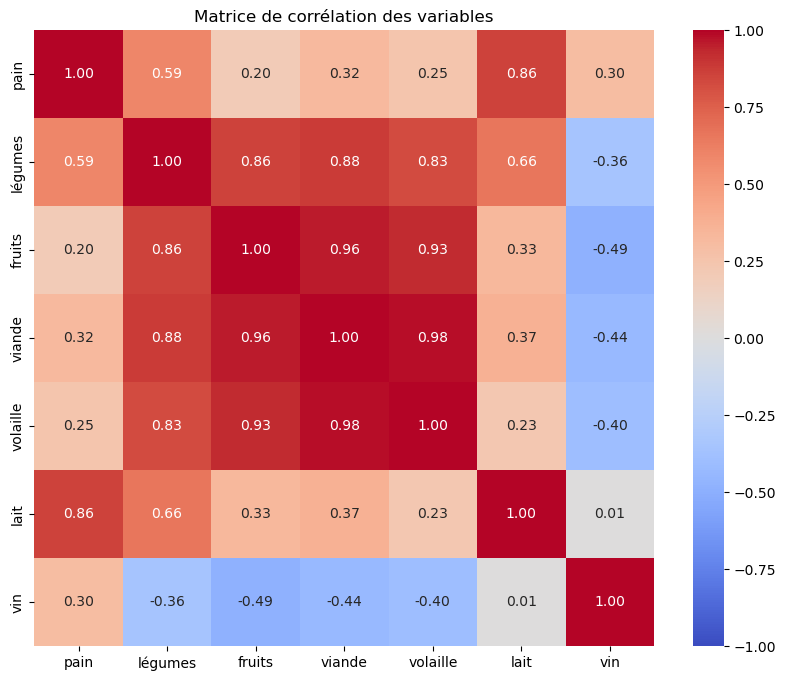

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables")
plt.show()


AttributeError: 'Styler' object has no attribute 'set_precision'

### Corrélations positives fortes :

- *fruits et viande (0,96)* : Il y a une corrélation élevée, indiquant qu'une augmentation de la consommation de fruits est généralement associée à une augmentation de la consommation de viande.
- *volaille est fortement corrélé avec fruits (0,93) et viande (0,98)*, suggérant qu'une consommation élevée de volaille est liée à une consommation accrue de fruits et de viande.
- *légumes et viande (0,88)* : Cela montre une forte association positive entre la consommation de légumes et de viande.

### Corrélations négatives :

- *légumes et vin (-0,36), fruits et vin (-0,49), ainsi que viande et vin (-0,44)* : Ces corrélations négatives indiquent qu'une augmentation de la consommation de légumes, fruits et viande tend à être associée à une diminution de la consommation de vin.

### Corrélations notables avec lait (lait) :

Le lait a une corrélation modérément positive avec pain (0,86), mais des corrélations plus faibles avec les autres variables.

## Appliquons l’algorithme de l’ACP à ce jeu de données

## Normalisation des données :
La normalisation est effectuée en soustrayant la moyenne de chaque valeur et en divisant le résultat par l'écart-type. Cela permet de mettre toutes les variables sur la même échelle, ce qui est important dans l'ACP.

In [5]:
df_norm = df.iloc[:,1:]
mean = df_norm.mean()
std = df_norm.std()

M_corr = (df_norm - mean)  / std
M_corr

,pain,légumes,fruits,viande,volaille,lait,vin
0,-1.070175,-1.606935,-0.914640,-1.136449,-1.117890,-0.949823,0.813809
1,-1.434159,-0.914473,-0.708695,-0.909033,-0.953022,-1.018125,-1.540548
2,-0.696858,0.185009,0.345261,0.154769,0.494606,-1.052276,0.897395
3,-0.379539,-0.893329,-0.993384,-0.959569,-1.045509,-0.292417,0.535187
4,-0.566197,-0.655460,-0.660237,-0.974731,-0.949000,-0.335106,-0.077782
5,-0.080885,0.586743,1.114528,1.157927,1.383289,-0.983974,-0.384266
6,0.815075,-0.380590,-0.835896,-0.674036,-0.667517,0.475979,0.535187
7,0.124439,-0.174437,-0.127202,-0.077700,-0.168890,0.356450,0.660567
8,-0.575530,0.301300,0.702637,1.210991,1.387310,-0.463172,-1.206202
9,1.944359,0.232583,-0.496692,-0.097915,-0.180953,1.167535,1.635744


## Calcul de la matrice de covariance :
Une fois les données normalisées, nous avons calculé la matrice de covariance cov_matrix des données transposées (chaque colonne représentant une variable). La matrice de covariance capture la relation entre les différentes variables (Poids et Taille).

In [6]:
np.cov(M_corr, rowvar=False)

array([[ 1.        ,  0.59311021,  0.19613878,  0.32126911,  0.24681402,
         0.8555748 ,  0.30376123],
       [ 0.59311021,  1.        ,  0.85625022,  0.88108065,  0.82730007,
         0.66279874, -0.35646825],
       [ 0.19613878,  0.85625022,  1.        ,  0.95947671,  0.9263958 ,
         0.33218856, -0.48628058],
       [ 0.32126911,  0.88108065,  0.95947671,  1.        ,  0.98168805,
         0.37459064, -0.43723528],
       [ 0.24681402,  0.82730007,  0.9263958 ,  0.98168805,  1.        ,
         0.23248901, -0.40185403],
       [ 0.8555748 ,  0.66279874,  0.33218856,  0.37459064,  0.23248901,
         1.        ,  0.0068796 ],
       [ 0.30376123, -0.35646825, -0.48628058, -0.43723528, -0.40185403,
         0.0068796 ,  1.        ]])

In [7]:
cov_m = np.dot(np.transpose(M_corr), M_corr)/(len(M_corr))
cov_m


array([[ 0.91666667,  0.54368436,  0.17979388,  0.29449669,  0.22624618,
         0.7842769 ,  0.27844779],
       [ 0.54368436,  0.91666667,  0.78489603,  0.80765726,  0.7583584 ,
         0.60756551, -0.32676256],
       [ 0.17979388,  0.78489603,  0.91666667,  0.87952032,  0.84919615,
         0.30450618, -0.4457572 ],
       [ 0.29449669,  0.80765726,  0.87952032,  0.91666667,  0.89988071,
         0.34337475, -0.40079901],
       [ 0.22624618,  0.7583584 ,  0.84919615,  0.89988071,  0.91666667,
         0.21311492, -0.3683662 ],
       [ 0.7842769 ,  0.60756551,  0.30450618,  0.34337475,  0.21311492,
         0.91666667,  0.0063063 ],
       [ 0.27844779, -0.32676256, -0.4457572 , -0.40079901, -0.3683662 ,
         0.0063063 ,  0.91666667]])

### Calcul des valeurs propres et des vecteurs propres :
En utilisant la matrice de covariance, nous avons calculé les valeurs propres et les vecteurs propres. Les valeurs propres indiquent la quantité de variance expliquée par chaque composante, tandis que les vecteurs propres représentent les directions de ces composantes.

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)
(eigenvalues, eigenvectors)


(array([3.97255959e+00, 1.67844314e+00, 5.77576025e-01, 1.17391309e-01,
        5.25219711e-02, 1.71813821e-02, 9.93256601e-04]),
 array([[ 0.23933966,  0.62217317,  0.01083219, -0.54455696,  0.04159202,
         -0.50660316, -0.02409971],
        [ 0.46584484,  0.09870419,  0.06153199, -0.02589548, -0.80957375,
          0.29638899,  0.15979114],
        [ 0.44641359, -0.20504494, -0.14617887,  0.54645281, -0.06624861,
         -0.62725958, -0.20211156],
        [ 0.46214139, -0.14079103, -0.20757431, -0.05279945,  0.41506042,
          0.09689067,  0.73421072],
        [ 0.43785707, -0.19715869, -0.35455789, -0.32223082,  0.21970933,
          0.35044279, -0.60727532],
        [ 0.28056559,  0.52265436,  0.4435151 ,  0.45202829,  0.3361929 ,
          0.33288055, -0.15246321],
        [-0.20593567,  0.47880409, -0.78052815,  0.30533   , -0.06998971,
          0.13800292,  0.04408155]]))

In [9]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues, sorted_eigenvectors

(array([3.97255959e+00, 1.67844314e+00, 5.77576025e-01, 1.17391309e-01,
        5.25219711e-02, 1.71813821e-02, 9.93256601e-04]),
 array([[ 0.23933966,  0.62217317,  0.01083219, -0.54455696,  0.04159202,
         -0.50660316, -0.02409971],
        [ 0.46584484,  0.09870419,  0.06153199, -0.02589548, -0.80957375,
          0.29638899,  0.15979114],
        [ 0.44641359, -0.20504494, -0.14617887,  0.54645281, -0.06624861,
         -0.62725958, -0.20211156],
        [ 0.46214139, -0.14079103, -0.20757431, -0.05279945,  0.41506042,
          0.09689067,  0.73421072],
        [ 0.43785707, -0.19715869, -0.35455789, -0.32223082,  0.21970933,
          0.35044279, -0.60727532],
        [ 0.28056559,  0.52265436,  0.4435151 ,  0.45202829,  0.3361929 ,
          0.33288055, -0.15246321],
        [-0.20593567,  0.47880409, -0.78052815,  0.30533   , -0.06998971,
          0.13800292,  0.04408155]]))

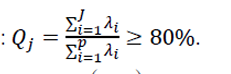

In [10]:
sorted_indices

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

##### Déterminons la qualité de la représentation des données sur les nouveaux axes.

In [11]:
# Sort eigenvalues in descending order (if not already sorted)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Calculate Q_j for a given J
J = 2
numerator = np.sum(sorted_eigenvalues[:J])
denominator = np.sum(sorted_eigenvalues)
Q_j = numerator / denominator

print("sorted_eigenvalues : ", sorted_eigenvalues)
# Check if Q_j is greater than or equal to 80%
if Q_j >= 0.8:
    print(f"Q_j = {Q_j:.2f}, which meets or exceeds 80%")
else:
    print(f"Q_j = {Q_j:.2f}, which is less than 80%")

sorted_eigenvalues :  [3.97255959e+00 1.67844314e+00 5.77576025e-01 1.17391309e-01
 5.25219711e-02 1.71813821e-02 9.93256601e-04]
Q_j = 0.88, which meets or exceeds 80%


Nous avons trouver que les deux premiers valeurs propres contiennent plus 88% de l'information totale de la matrice de covariance. Nous avons donc choisi de garder les deux premiers axes.

### Projection sur les composantes principales

In [15]:
# Projection des données sur les deux premières composantes principales
projected_data = M_corr.dot(eigenvectors[:,:2])
projected_data.s

,0,1
0,-2.861781,-0.363274
1,-1.891410,-1.791111
2,-0.118417,-0.725705
3,-2.043948,0.324020
4,-1.679586,-0.169641
5,1.695386,-1.354959
6,-0.935819,1.372475
7,-0.254147,0.633107
8,1.601821,-1.736042
9,0.218209,2.777409


In [25]:
# Créer un graphique pour représenter les individus dans l'espace des composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='b', label="Individus")
for i, (x, y) in enumerate(projected_data):
    plt.text(x, y, f"Ind {i+1}", fontsize=9, ha='right')

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Représentation des individus dans l'espace réduit")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

KeyError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>

KeyError: (slice(None, None, None), 0)

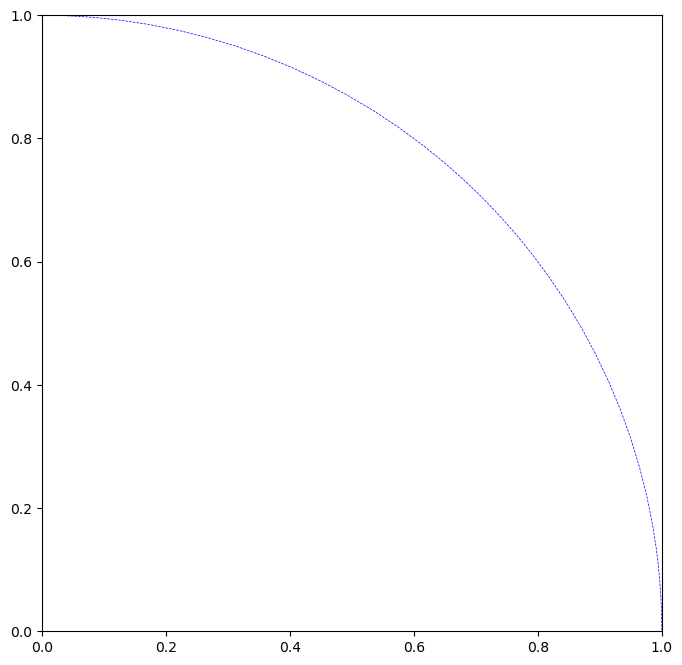

In [20]:
# Correction de l'affichage des vecteurs de corrélation dans le cercle des corrélations

# Recalcul des normes pour les valeurs projetées et normalisation
norms = np.linalg.norm(projected_data, axis=0)
correlation_circle = projected_data / norms

# Création du cercle des corrélations avec ajustement
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
ax.add_artist(circle)

# Tracé des vecteurs pour chaque variable en utilisant des moyennes pour une meilleure représentation
variables = [f"Var{i+1}" for i in range(projected_data.shape[1]-1)]
for i in range(projected_data.shape[1]):
    plt.arrow(0, 0, correlation_circle[:, 0][i], correlation_circle[:, 1][i], 
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(correlation_circle[:, 0][i], correlation_circle[:, 1][i], variables[i], 
             color='g', ha='center', va='center', fontsize=12)

# Définition des limites et des axes du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Labels et titre
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Cercle des Corrélations - ACP")
plt.grid(False)
plt.show()


KeyError: (0, 0)

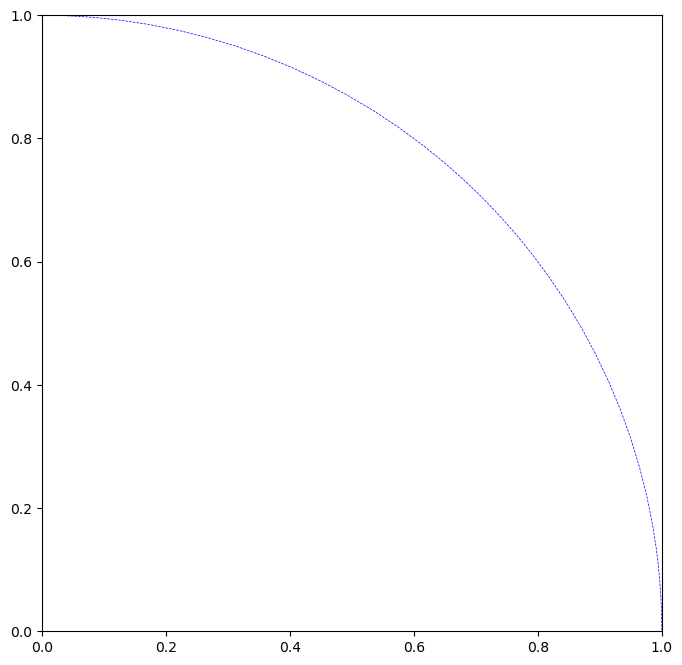

In [ ]:
# Code pour créer le cercle des corrélations
import matplotlib.pyplot as plt

# Normalisation des coordonnées pour le cercle des corrélations
norms = np.linalg.norm(projected_data, axis=0)
correlation_circle = projected_data / norms

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
ax.add_artist(circle)

# Ajout des vecteurs pour chaque variable avec des labels I1 à I6
variables = df.iloc[:,1:].columns
for i in range(len(variables)):
    plt.arrow(0, 0, correlation_circle[i, 0], correlation_circle[i, 1], 
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(correlation_circle[i, 0], correlation_circle[i, 1], variables[i], 
             color='g', ha='center', va='center', fontsize=12)

# Configuration du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Cercle des Corrélations - ACP")
plt.grid(False)
plt.show()

In [ ]:
correlation_circle

,0,1,2,3,4,5,6
0,-0.414487,-0.080945,-0.152308,0.306628,0.281433,-0.145671,-0.192006
1,-0.273943,-0.399097,0.497319,-0.133217,-0.117801,-0.161926,0.277679
2,-0.017151,-0.161702,-0.539860,0.163581,-0.560912,0.337361,-0.093075
3,-0.296036,0.072199,0.041246,0.089110,0.011949,0.149240,0.602114
4,-0.243263,-0.037800,0.190278,0.123472,-0.213453,-0.093799,-0.451941
5,0.245552,-0.301913,-0.377937,-0.363218,-0.090177,-0.589864,0.125052
6,-0.135540,0.305816,0.105430,-0.220349,0.117813,-0.150487,-0.458062
7,-0.036809,0.141070,-0.103424,0.243144,0.200365,0.238174,0.138529
8,0.232000,-0.386827,-0.037075,-0.336229,0.531225,0.491112,-0.145705
9,0.031604,0.618865,-0.215167,-0.206908,0.155079,-0.138839,0.208762
